In [2]:
# Upload the Datset

from google.colab import files
files.upload()


Output hidden; open in https://colab.research.google.com to view.

## 1. Data Cleaning

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras


# Define the Data

df = pd.read_csv("fake_train.csv")
print(df.head())
print("\nShape :",df.shape)


# Check for Null

AnyNull = df.isnull().sum()
print("\n", AnyNull)


# Drop the Null Value rows

df = df.dropna()
print("\n", df.isnull().sum())



   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  

Shape : (20800, 5)

 id           0
title      558
author    1957
text        39
label        0
dtype: int64

 id        0
title     0
author    0

## 2. Data Preprocessing

In [8]:
import spacy


# Create a function to remove stop words & Lemmatize the Data

nlp = spacy.load('en_core_web_sm')


def preprocess(text):

  text = text.lower()
  doc = nlp(text)
  Filter = []

  for token in doc:

    if token.is_stop or token.is_punct:
      continue

    Filter.append(token.lemma_)

  return " ".join(Filter)


# Apply the Function to the Title Column

df['title'] = df['title'].apply(preprocess)
print(df.head())


   id                                              title              author  \
0   0   house dem aide comey letter jason chaffetz tweet       Darrell Lucus   
1   1   flynn hillary clinton big woman campus breitbart     Daniel J. Flynn   
2   2                                         truth fire  Consortiumnews.com   
3   3         15 civilian kill single airstrike identify     Jessica Purkiss   
4   4  iranian woman jail fictional unpublished story...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [12]:
# Dop the columns

df = df.drop(['id','text', 'author'], axis=1)
print(df.head())


                                               title  label
0   house dem aide comey letter jason chaffetz tweet      1
1   flynn hillary clinton big woman campus breitbart      0
2                                         truth fire      1
3         15 civilian kill single airstrike identify      1
4  iranian woman jail fictional unpublished story...      1


In [16]:
# One Hot Represntation in Tensorflow

from tensorflow.keras.preprocessing.text import one_hot


voc_size = 5000 #-------> Define the vocabulary size

OHR = [one_hot(word, voc_size) for word in df['title']]
OHR


[[3135, 2759, 49, 2482, 3732, 4963, 2858, 4162],
 [4516, 2744, 304, 4366, 4627, 3834, 2413],
 [4934, 3102],
 [3343, 389, 2295, 726, 942, 4412],
 [3038, 4627, 4617, 1153, 288, 4767, 4627, 1177, 4631, 774],
 [2641,
  3101,
  4547,
  2043,
  122,
  4874,
  2378,
  366,
  892,
  804,
  4030,
  84,
  1854,
  2413],
 [4660, 2150, 2907, 1522, 2851, 3943, 864, 4563, 2311, 1475, 38],
 [4195, 4628, 3156, 3997, 1349, 122, 476, 2311, 1475, 38],
 [49, 4590, 521, 3181, 3021, 3713, 2082, 1874, 122, 1508],
 [3119, 1258, 1572, 820, 3342, 4064, 1099, 2321],
 [4483, 3443, 4753, 2787, 3977, 3545, 3242, 3125, 491, 1674, 499],
 [2433, 3713, 122, 3997],
 [4432, 2784, 1096, 4411, 966, 213, 860, 2261, 4985],
 [3739, 1247, 2183, 1641, 2004, 4817, 3437, 2311, 1475, 38],
 [1316, 4341, 1261, 1822, 41, 2311, 1475, 38],
 [1078, 4750, 2784, 3100, 135, 1342, 605, 4439, 1379, 4975, 737],
 [4023, 3072, 2744],
 [3980, 2220, 3716, 1472, 122, 4842, 817, 2413],
 [1121, 1110, 304, 4272, 4348, 144, 4940, 2639, 4767],
 [129, 7

In [19]:
# To Check the One Hot Representation

Text = df.title[1]
print("Text :", Text)


One_Hot_Representation = OHR[1]
print("\nOne Hot Representation :", One_Hot_Representation)



Text : flynn hillary clinton big woman campus breitbart

One Hot Representation : [4516, 2744, 304, 4366, 4627, 3834, 2413]


## 3. Data Representation

In [24]:
# padding - To make all the sentence to same size

from tensorflow.keras.preprocessing.sequence import pad_sequences


sent_length = 20 #-----------> Define the sentence size

Emb = pad_sequences(OHR, padding='pre', maxlen=sent_length)
print(Emb)


[[   0    0    0 ... 4963 2858 4162]
 [   0    0    0 ... 4627 3834 2413]
 [   0    0    0 ...    0 4934 3102]
 ...
 [   0    0    0 ... 2311 1475   38]
 [   0    0    0 ... 2613 3225 3499]
 [   0    0    0 ... 1023  416 3154]]


In [25]:
# To Check the padding

Embed = Emb[1]
print("Embedding :", Embed)


Embedding : [   0    0    0    0    0    0    0    0    0    0    0    0    0 4516
 2744  304 4366 4627 3834 2413]


## 4. Creating a LSTM Neural Network

In [29]:
# Create a Neural Network

embedding_vector_features = 50 # Define the embedding dimension

Model = keras.Sequential([

    keras.layers.Embedding(voc_size, embedding_vector_features),
    keras.layers.LSTM(100),
    keras.layers.Dense(1, activation='sigmoid')

])

# Build the model by passing the input shape
Model.build(input_shape=(None, sent_length))

# Compile
Model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(Model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 20, 50)         │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,501 (1.18 MB)

 Trainable params: 310,501 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
# Shape of Title and it's Represntation

print("Shape of Title :",df.title.shape)

print("\nShape of Representation :",Emb.shape)

print("\nShape of Label :", df.label.shape)


Shape of Title : (18285,)

Shape of Representation : (18285, 20)

Shape of Label : (18285,)


In [35]:
# Convert to Array

x = np.array(Emb)
y = np.array(df.label)


print("Shape of x :", x.shape)
print("Shape of y :", y.shape)



Shape of x : (18285, 20)
Shape of y : (18285,)


In [36]:
# Split the Data to Train & Test

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8017 - loss: 0.4008 - val_accuracy: 0.9180 - val_loss: 0.2008
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9514 - loss: 0.1264 - val_accuracy: 0.9156 - val_loss: 0.1953
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9688 - loss: 0.0893 - val_accuracy: 0.9105 - val_loss: 0.2224
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9768 - loss: 0.0649 - val_accuracy: 0.9149 - val_loss: 0.2731
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9851 - loss: 0.0440 - val_accuracy: 0.9047 - val_loss: 0.3078
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9893 - loss: 0.0316 - val_accuracy: 0.9079 - val_loss: 0.3455
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9934 - loss: 0.0232 - val_accuracy: 0.9120 - val_loss: 0.4211
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9951 - loss: 0.0166 - val_

In [37]:
# Prediction

y_pred = Model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)   #-------->  Keeping a Threshold


# Evaluation

Evaluation = Model.evaluate(x_test, y_test)
print("Evaluation :", Evaluation)


172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9012 - loss: 0.5951
Evaluation : [0.5629762411117554, 0.9061246514320374]


In [40]:
# Classification Matrix

CR = classification_report(y_test, y_pred)
print("Classification Report :\n\n", CR)



# Confusion Matrix

CM = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix :\n\n", CM)


Classification Report :

               precision    recall  f1-score   support

           0       0.93      0.90      0.92      3107
           1       0.87      0.92      0.89      2379

    accuracy                           0.91      5486
   macro avg       0.90      0.91      0.90      5486
weighted avg       0.91      0.91      0.91      5486


Confusion Matrix :

 [[2788  319]
 [ 196 2183]]


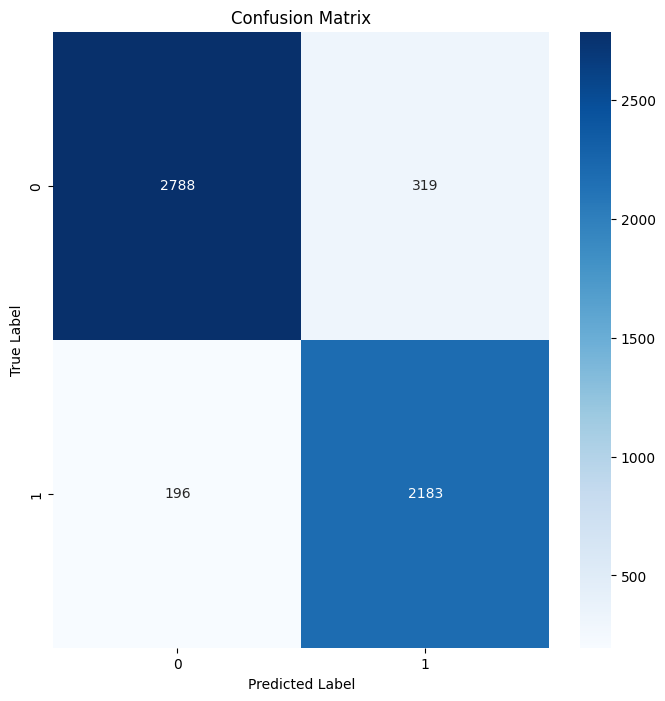

In [41]:
# Plot


plt.figure(figsize=(8,8))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()
